In [ ]:
import torch
import pandas as pd

from torch import nn
from torch.utils.data import DataLoader

from utils.dataset import MovieDataset
from utils.models import MLPRegressor


torch.manual_seed(4)

# Set up

In [ ]:
from utils.loops import train_loop, eval_loop

def run_epochs(
    epochs: int,
    model, loss_fn,
    optimizer, train_loader,
    test_loader,
    use_gpu: bool = False
):
    epoch_loss = {
        'train': [],
        'eval': []
    }
    for epoch in range(epochs):
        print(f"Epoch {epoch}")
        losses = train_loop(model, loss_fn,
            optimizer, train_loader,
            use_gpu
        )

        print(f"  Train loss: {sum(losses) / len(losses)}")
        eval_losses = eval_loop(model,
            loss_fn, test_loader,
            use_gpu
        )

        print(f"  Eval loss: {sum(eval_losses) / len(eval_losses)}\n")

        epoch_loss['train'].append(losses)
        epoch_loss['eval'].append(eval_losses)
    return epoch_loss

# Load Data and model

In [ ]:
dfs = [
    pd.read_csv('../dataset/train_data/train_data.csv', index_col=0),
    pd.read_csv('../dataset/train_data/test_data.csv', index_col=0),
]

train_data = MovieDataset(dfs[0])
test_data = MovieDataset(dfs[1])

In [ ]:
batch_size = 16

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [ ]:
mlp_model = MLPRegressor(768 + train_data[0][0].shape[0])
mse_loss = nn.MSELoss()
adam_opt = torch.optim.Adam(mlp_model.parameters(), lr=1e-5)

# Training

In [ ]:
epochs = 50
global_loss = {
    'train': [],
    'eval': []
}
gpu_avail = torch.cuda.is_available()
if gpu_avail: mlp_model.cuda()

In [ ]:
loss = run_epochs(
    epochs, mlp_model,
    mse_loss, adam_opt,
    train_loader, test_loader,
    gpu_avail
)

global_loss['train'].extend(loss['train'])
global_loss['eval'].extend(loss['eval'])

Epoch 0


100%|██████████| 50/50 [00:04<00:00, 12.39it/s, Loss: 0.03346648067235947]


  Train loss: 0.05212854068726301
  Eval loss: 0.09636139353880516

Epoch 1


100%|██████████| 50/50 [00:03<00:00, 12.61it/s, Loss: 0.06619744747877121]


  Train loss: 0.04792853131890297
  Eval loss: 0.09076187673669595

Epoch 2


100%|██████████| 50/50 [00:03<00:00, 12.71it/s, Loss: 0.07910555601119995]


  Train loss: 0.051122233644127844
  Eval loss: 0.1096828356385231

Epoch 3


100%|██████████| 50/50 [00:03<00:00, 12.61it/s, Loss: 0.0339018888771534]


  Train loss: 0.054338312074542046
  Eval loss: 0.09131740320187348

Epoch 4


100%|██████████| 50/50 [00:04<00:00, 12.42it/s, Loss: 0.014451084658503532]


  Train loss: 0.060371332429349424
  Eval loss: 0.08631195815709922

Epoch 5


100%|██████████| 50/50 [00:04<00:00, 12.21it/s, Loss: 0.07646192610263824]


  Train loss: 0.04840488687157631
  Eval loss: 0.09845162068422024

Epoch 6


100%|██████████| 50/50 [00:03<00:00, 12.50it/s, Loss: 0.04035523906350136]


  Train loss: 0.05157314229756594
  Eval loss: 0.10105746239423752

Epoch 7


100%|██████████| 50/50 [00:04<00:00, 12.31it/s, Loss: 0.027699995785951614]


  Train loss: 0.052658123783767226
  Eval loss: 0.09079799256645717

Epoch 8


100%|██████████| 50/50 [00:04<00:00, 12.17it/s, Loss: 0.039561230689287186]


  Train loss: 0.04475411467254162
  Eval loss: 0.08566596645575303

Epoch 9


100%|██████████| 50/50 [00:03<00:00, 12.59it/s, Loss: 0.009834627620875835]


  Train loss: 0.04725480545312166
  Eval loss: 0.08627391033447705

Epoch 10


100%|██████████| 50/50 [00:04<00:00, 12.50it/s, Loss: 0.01837318018078804]


  Train loss: 0.04428924774751067
  Eval loss: 0.09532363884724103

Epoch 11


100%|██████████| 50/50 [00:04<00:00, 12.42it/s, Loss: 0.03904624283313751]


  Train loss: 0.047105154432356355
  Eval loss: 0.08689945219801022

Epoch 12


100%|██████████| 50/50 [00:03<00:00, 12.72it/s, Loss: 0.02366703562438488]


  Train loss: 0.04960560977458954
  Eval loss: 0.09048122597428468

Epoch 13


100%|██████████| 50/50 [00:03<00:00, 12.92it/s, Loss: 0.07840591669082642]


  Train loss: 0.06093454023823142
  Eval loss: 0.11010135280398223

Epoch 14


100%|██████████| 50/50 [00:03<00:00, 12.60it/s, Loss: 0.0685136541724205]


  Train loss: 0.04499671183526516
  Eval loss: 0.08870846405625343

Epoch 15


100%|██████████| 50/50 [00:03<00:00, 12.68it/s, Loss: 0.03914574906229973]


  Train loss: 0.04480085203424096
  Eval loss: 0.10541347356942984

Epoch 16


100%|██████████| 50/50 [00:03<00:00, 12.59it/s, Loss: 0.05366773530840874]


  Train loss: 0.04840032709762454
  Eval loss: 0.08266546605871274

Epoch 17


100%|██████████| 50/50 [00:03<00:00, 12.78it/s, Loss: 0.07155204564332962]


  Train loss: 0.04628946911543608
  Eval loss: 0.11116730249845065

Epoch 18


100%|██████████| 50/50 [00:03<00:00, 12.67it/s, Loss: 0.0649590790271759]


  Train loss: 0.04476303881034255
  Eval loss: 0.10549700202850196

Epoch 19


100%|██████████| 50/50 [00:03<00:00, 12.75it/s, Loss: 0.05760617181658745]


  Train loss: 0.048613937608897685
  Eval loss: 0.09478781916774236

Epoch 20


100%|██████████| 50/50 [00:03<00:00, 12.71it/s, Loss: 0.0534902848303318]


  Train loss: 0.04815381318330765
  Eval loss: 0.10611226638922325

Epoch 21


100%|██████████| 50/50 [00:03<00:00, 12.74it/s, Loss: 0.04138102009892464]


  Train loss: 0.04616028130054474
  Eval loss: 0.09678575539818177

Epoch 22


100%|██████████| 50/50 [00:04<00:00, 12.45it/s, Loss: 0.07626799494028091]


  Train loss: 0.051266666185110804
  Eval loss: 0.08302043836850387

Epoch 23


100%|██████████| 50/50 [00:03<00:00, 12.67it/s, Loss: 0.020374756306409836]


  Train loss: 0.043138231765478846
  Eval loss: 0.09333174045269306

Epoch 24


100%|██████████| 50/50 [00:03<00:00, 12.62it/s, Loss: 0.027170080691576004]


  Train loss: 0.050264814719557765
  Eval loss: 0.11479703165017642

Epoch 25


100%|██████████| 50/50 [00:03<00:00, 12.50it/s, Loss: 0.02542712911963463]


  Train loss: 0.04569294136017561
  Eval loss: 0.12798866715568763

Epoch 26


100%|██████████| 50/50 [00:03<00:00, 12.57it/s, Loss: 0.04478331655263901]


  Train loss: 0.0426595713570714
  Eval loss: 0.10115322241416344

Epoch 27


100%|██████████| 50/50 [00:04<00:00, 12.43it/s, Loss: 0.06240316480398178]


  Train loss: 0.04587938675656915
  Eval loss: 0.11893246953303997

Epoch 28


100%|██████████| 50/50 [00:04<00:00, 12.38it/s, Loss: 0.024650219827890396]


  Train loss: 0.05020706199109554
  Eval loss: 0.1193492105947091

Epoch 29


100%|██████████| 50/50 [00:03<00:00, 12.56it/s, Loss: 0.04394979774951935]


  Train loss: 0.04638547521084547
  Eval loss: 0.1028652758552478

Epoch 30


100%|██████████| 50/50 [00:03<00:00, 12.75it/s, Loss: 0.054012324661016464]


  Train loss: 0.0414834800362587
  Eval loss: 0.0972436643563784

Epoch 31


100%|██████████| 50/50 [00:04<00:00, 12.38it/s, Loss: 0.03514214977622032]


  Train loss: 0.04201459802687168
  Eval loss: 0.09432488593917626

Epoch 32


100%|██████████| 50/50 [00:04<00:00, 12.48it/s, Loss: 0.07182936370372772]


  Train loss: 0.04664737898856401
  Eval loss: 0.12809016612859872

Epoch 33


100%|██████████| 50/50 [00:04<00:00, 12.41it/s, Loss: 0.04952892288565636]


  Train loss: 0.04206200007349253
  Eval loss: 0.08630526581635842

Epoch 34


100%|██████████| 50/50 [00:03<00:00, 12.82it/s, Loss: 0.10071786493062973]


  Train loss: 0.0434749305807054
  Eval loss: 0.09397184906097558

Epoch 35


100%|██████████| 50/50 [00:03<00:00, 12.73it/s, Loss: 0.051824674010276794]


  Train loss: 0.044867959320545193
  Eval loss: 0.0913562596990512

Epoch 36


100%|██████████| 50/50 [00:04<00:00, 12.38it/s, Loss: 0.061442822217941284]


  Train loss: 0.04083044545724988
  Eval loss: 0.10097079294232222

Epoch 37


100%|██████████| 50/50 [00:03<00:00, 12.58it/s, Loss: 0.040753889828920364]


  Train loss: 0.040739934481680395
  Eval loss: 0.08678620824447045

Epoch 38


100%|██████████| 50/50 [00:03<00:00, 12.52it/s, Loss: 0.09395256638526917]


  Train loss: 0.046801917292177676
  Eval loss: 0.09064543304535058

Epoch 39


100%|██████████| 50/50 [00:03<00:00, 12.52it/s, Loss: 0.07467187941074371]


  Train loss: 0.05081451594829559
  Eval loss: 0.09090395329090264

Epoch 40


100%|██████████| 50/50 [00:03<00:00, 12.62it/s, Loss: 0.04437736049294472]


  Train loss: 0.03935427321121097
  Eval loss: 0.09532796304959518

Epoch 41


100%|██████████| 50/50 [00:03<00:00, 12.66it/s, Loss: 0.05124270170927048]


  Train loss: 0.04023961128666997
  Eval loss: 0.11585494875907898

Epoch 42


100%|██████████| 50/50 [00:04<00:00, 12.31it/s, Loss: 0.014723419211804867]


  Train loss: 0.04354393506422639
  Eval loss: 0.08894222516279954

Epoch 43


100%|██████████| 50/50 [00:03<00:00, 12.53it/s, Loss: 0.07255519926548004]


  Train loss: 0.04348747491836548
  Eval loss: 0.09030155722911541

Epoch 44


100%|██████████| 50/50 [00:03<00:00, 12.57it/s, Loss: 0.07559427618980408]


  Train loss: 0.04642968438565731
  Eval loss: 0.09194830862375405

Epoch 45


100%|██████████| 50/50 [00:03<00:00, 12.76it/s, Loss: 0.04948911443352699]


  Train loss: 0.04170182878151536
  Eval loss: 0.09148926545794193

Epoch 46


100%|██████████| 50/50 [00:03<00:00, 12.86it/s, Loss: 0.0926123857498169]


  Train loss: 0.04552016027271748
  Eval loss: 0.08297410578681873

Epoch 47


100%|██████████| 50/50 [00:04<00:00, 12.45it/s, Loss: 0.0211094431579113]


  Train loss: 0.04802835082635284
  Eval loss: 0.09691144783909504

Epoch 48


100%|██████████| 50/50 [00:04<00:00, 12.47it/s, Loss: 0.09414871782064438]


  Train loss: 0.049639930985867976
  Eval loss: 0.09306176751852036

Epoch 49


100%|██████████| 50/50 [00:03<00:00, 12.62it/s, Loss: 0.054448604583740234]


  Train loss: 0.05233952391892672
  Eval loss: 0.08975385817197654



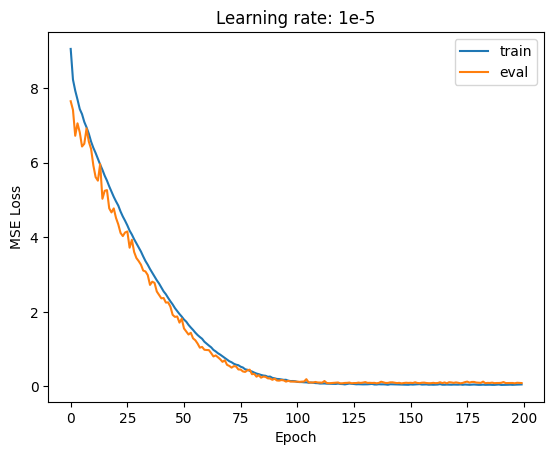

In [ ]:
import matplotlib.pyplot as plt

plt.title('Learning rate: 1e-5')
plt.plot([sum(loss) / len(loss) for loss in global_loss['train']], label='train')
plt.plot([sum(loss) / len(loss) for loss in global_loss['eval']], label='eval')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend();

In [ ]:
checkpoint = {
    'model': mlp_model.state_dict(),
    'optimizer': adam_opt.state_dict(),
    'loss': global_loss,
    'batch_size': batch_size,
    'lr': 1e-5
}

torch.save(checkpoint, '../model_checkpoints/mlp_model_cp3.tar')